In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
from scipy import stats

In [2]:
adult_df = pd.read_csv('adult/adult/Source/adult.data', header=None)

In [3]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.columns = ['age','workclass','fnlwgt','edu','edu_num','marital_status','occupation','relationship','race','sex','capital-gain','capital-loss','hrspweek','native','income']

In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
edu               32561 non-null object
edu_num           32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hrspweek          32561 non-null int64
native            32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
adult_df.describe()

,age,fnlwgt,edu_num,capital-gain,capital-loss,hrspweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


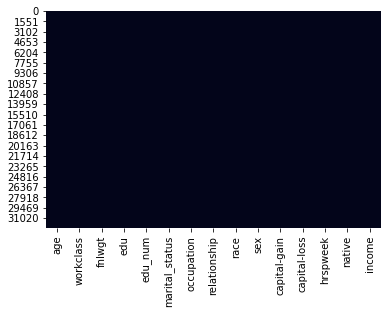

In [7]:
sb.heatmap(adult_df.isnull(), cbar=False)

In [8]:
df_obj = adult_df.select_dtypes(['object'])
print(df_obj)

               workclass            edu          marital_status  \
0              State-gov      Bachelors           Never-married   
1       Self-emp-not-inc      Bachelors      Married-civ-spouse   
2                Private        HS-grad                Divorced   
3                Private           11th      Married-civ-spouse   
4                Private      Bachelors      Married-civ-spouse   
5                Private        Masters      Married-civ-spouse   
6                Private            9th   Married-spouse-absent   
7       Self-emp-not-inc        HS-grad      Married-civ-spouse   
8                Private        Masters           Never-married   
9                Private      Bachelors      Married-civ-spouse   
10               Private   Some-college      Married-civ-spouse   
11             State-gov      Bachelors      Married-civ-spouse   
12               Private      Bachelors           Never-married   
13               Private     Assoc-acdm           Never-marrie

In [9]:
adult_df[df_obj.columns] = df_obj.apply(lambda x:x.str.strip())

In [10]:
for each in adult_df.columns:
    adult_df[each] = adult_df[each].replace(to_replace='?',value=np.nan)

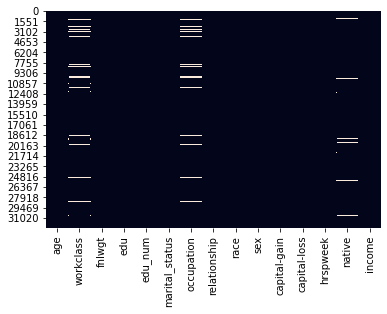

In [11]:
sb.heatmap(adult_df.isnull(), cbar=False)

In [12]:
adult_df = adult_df.dropna(axis=0, how='any')

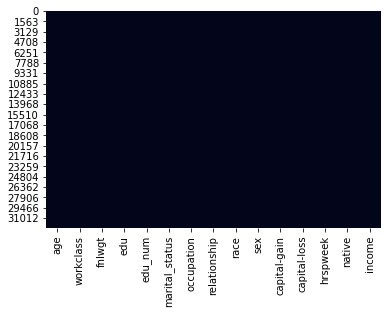

In [13]:
sb.heatmap(adult_df.isnull(), cbar=False)

In [14]:
print(adult_df.shape)
adult_df = adult_df.drop_duplicates(keep='first')

(30162, 15)


In [15]:
# Exploratory Data Analysis

In [16]:
adult_df.shape

(30139, 15)

In [17]:
numerical_cols = adult_df.select_dtypes(include=['int64','float64'])
print(numerical_cols.columns)

Index(['age', 'fnlwgt', 'edu_num', 'capital-gain', 'capital-loss', 'hrspweek'], dtype='object')


In [18]:
categorical_cols = adult_df.select_dtypes(include=['object'])
print(categorical_cols.columns)

Index(['workclass', 'edu', 'marital_status', 'occupation', 'relationship',
       'race', 'sex', 'native', 'income'],
      dtype='object')


In [19]:
#sb.boxplot(x=adult_train['age'])
#plt.plot()

In [20]:
#z = np.abs(stats.zscore(adult_train))
#print(z)

In [21]:
#threshold = 3.5
#print(np.where(z>threshold))

In [22]:
#print(z[206])

In [23]:
#adult_train = adult_train[(z<threshold).all(axis=1)]

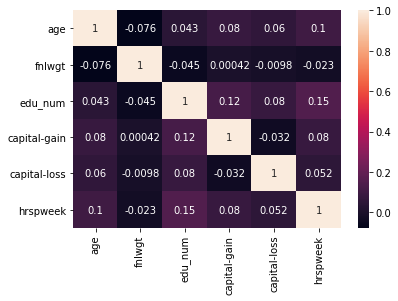

In [24]:
sb.heatmap(numerical_cols.corr(), annot=True)

In [25]:
income = adult_df.values[:,-1]
count = Counter(income)
print('Total:',len(income))
for k,v in count.items():
    per = v / len(income) * 100
    print('Class: %s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Total: 30139
Class: <=50K, Count=22633, Percentage=75.095%
Class: >50K, Count=7506, Percentage=24.905%


C:\Users\Riya\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Riya\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Riya\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Riya\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning

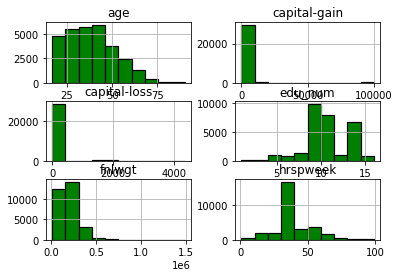

In [26]:
numerical_cols.hist(edgecolor='black', linewidth=1.2, color='green')
plt.show()

Miniumum age: 17
Maximum age: 90


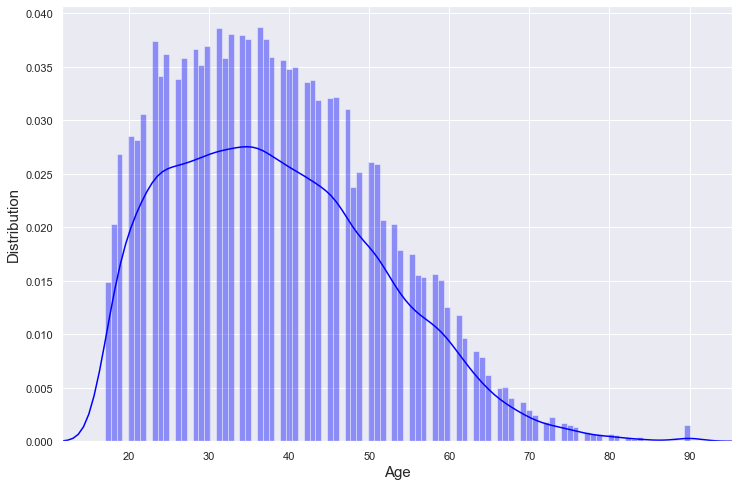

In [27]:
print('Miniumum age:', adult_df['age'].min())
print('Maximum age:', adult_df['age'].max())
plt.rcParams['figure.figsize'] = [12, 8]
sb.set(style='darkgrid')
sb.distplot(adult_df['age'], bins=100, color='blue')
plt.ylabel("Distribution", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.margins(x=0)

Private             73.871064
Self-emp-not-inc     8.288264
Local-gov            6.858224
State-gov            4.243671
Self-emp-inc         3.563489
Federal-gov          3.128836
Without-pay          0.046451
Name: workclass, dtype: float64


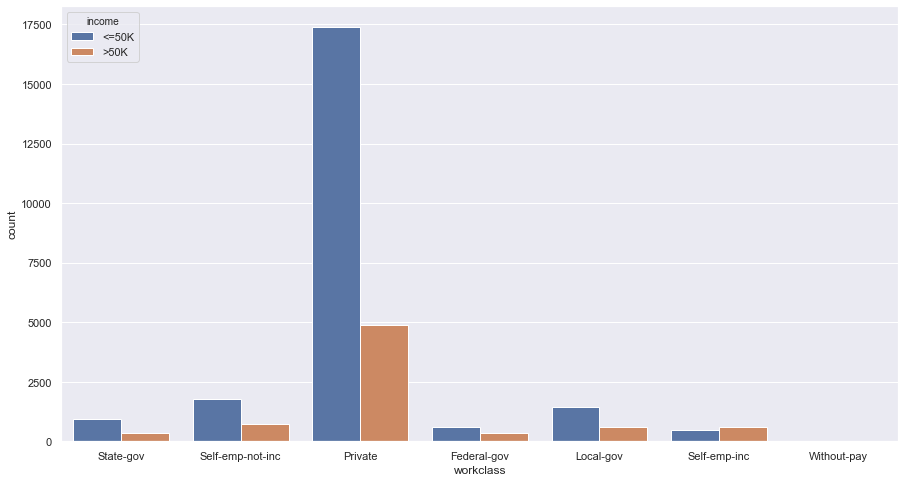

In [28]:
print(adult_df['workclass'].value_counts()/adult_df['workclass'].count()*100)
plt.figure(figsize=(15,8))
sb.countplot(adult_df['workclass'], hue=adult_df['income'])

Prof-specialty       13.384651
Craft-repair         13.354789
Exec-managerial      13.241979
Adm-clerical         12.339494
Sales                11.891569
Other-service        10.647334
Machine-op-inspct     6.516474
Transport-moving      5.215833
Handlers-cleaners     4.475928
Farming-fishing       3.274827
Tech-support          3.022662
Protective-serv       2.136766
Priv-house-serv       0.467832
Armed-Forces          0.029862
Name: occupation, dtype: float64


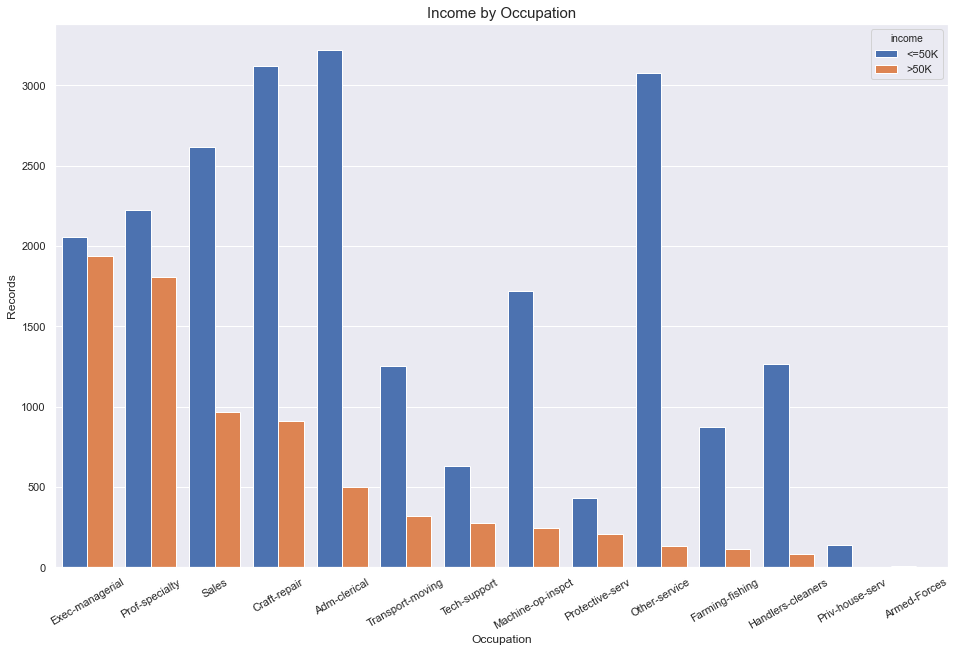

In [29]:
print(adult_df['occupation'].value_counts()/adult_df['occupation'].count()*100)
order = (adult_df.occupation[adult_df.income=='>50K'].value_counts()/adult_df.shape[0]).index
total = adult_df.shape[0]
plt.rcParams['figure.figsize'] = [16, 10]
sb.countplot(x='occupation', hue='income', order=order, data=adult_df, saturation=1)
plt.title('Income by Occupation', fontsize=15)
plt.ylabel('Records')
plt.xlabel('Occupation')
plt.xticks(rotation=30)
plt.show()

HS-grad         32.628820
Some-college    22.127476
Bachelors       16.729155
Masters          5.395003
Assoc-voc        4.336574
11th             3.477222
Assoc-acdm       3.344504
10th             2.720727
7th-8th          1.844786
Prof-school      1.798334
9th              1.509672
12th             1.250871
Doctorate        1.244235
5th-6th          0.952255
1st-4th          0.494376
Preschool        0.145990
Name: edu, dtype: float64


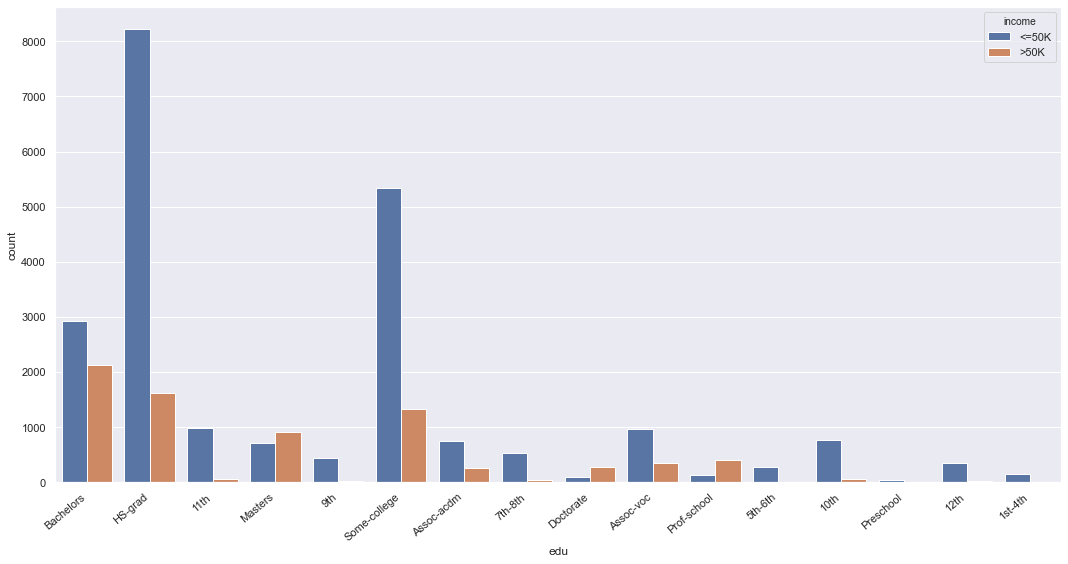

In [30]:
print(adult_df['edu'].value_counts()/adult_df['edu'].count()*100)

plt.figure(figsize=(15,8))
ax = sb.countplot(adult_df['edu'], hue=adult_df['income']);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Married-civ-spouse       46.647201
Never-married            32.220711
Divorced                 13.975248
Separated                 3.115565
Widowed                   2.743953
Married-spouse-absent     1.227645
Married-AF-spouse         0.069677
Name: marital_status, dtype: float64


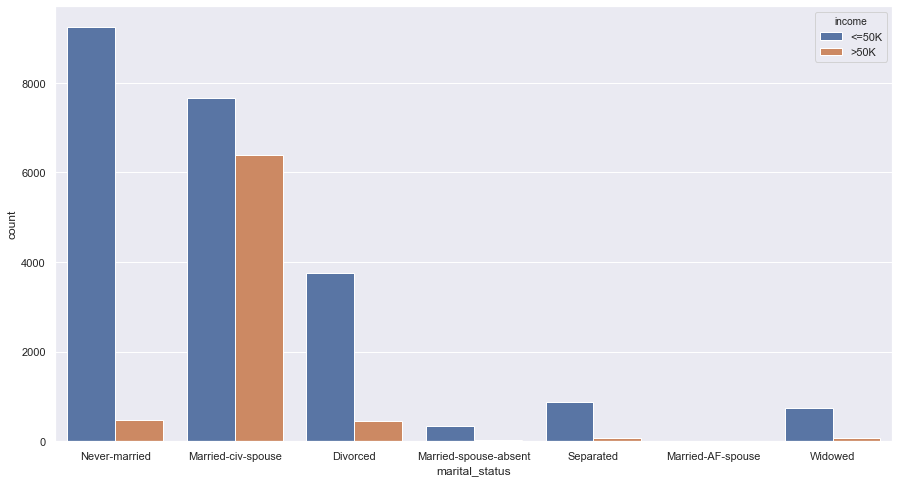

In [31]:
print(adult_df['marital_status'].value_counts()/adult_df['marital_status'].count()*100)

plt.figure(figsize=(15,8))
sb.countplot(adult_df['marital_status'], hue=adult_df['income'])

Husband           41.331829
Not-in-family     25.594744
Own-child         14.804738
Unmarried         10.653970
Wife               4.665052
Other-relative     2.949667
Name: relationship, dtype: float64


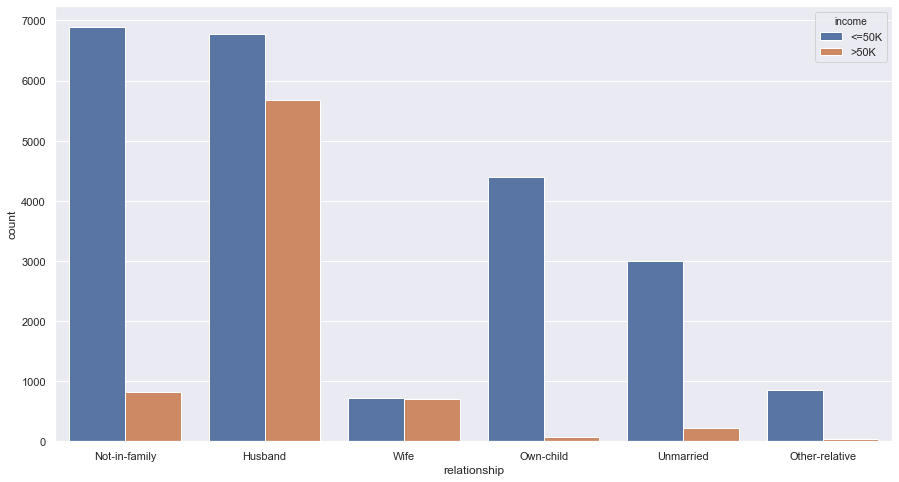

In [32]:
print(adult_df['relationship'].value_counts()/adult_df['relationship'].count()*100)

plt.figure(figsize=(15,8))
sb.countplot(adult_df['relationship'], hue=adult_df['income'])

White                 85.974983
Black                  9.343376
Asian-Pac-Islander     2.966256
Amer-Indian-Eskimo     0.948937
Other                  0.766449
Name: race, dtype: float64


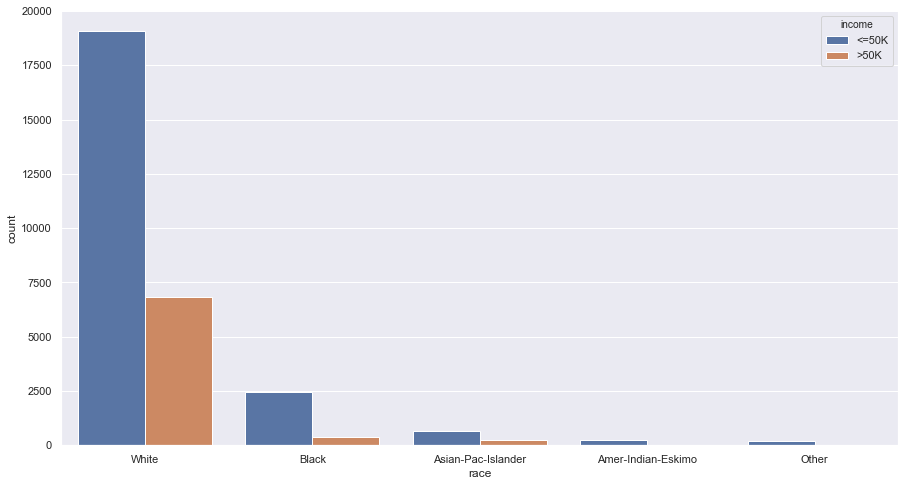

In [33]:
print(adult_df['race'].value_counts()/adult_df['race'].count()*100)

plt.figure(figsize=(15,8))
sb.countplot(adult_df['race'], hue=adult_df['income'])

Male      67.573576
Female    32.426424
Name: sex, dtype: float64


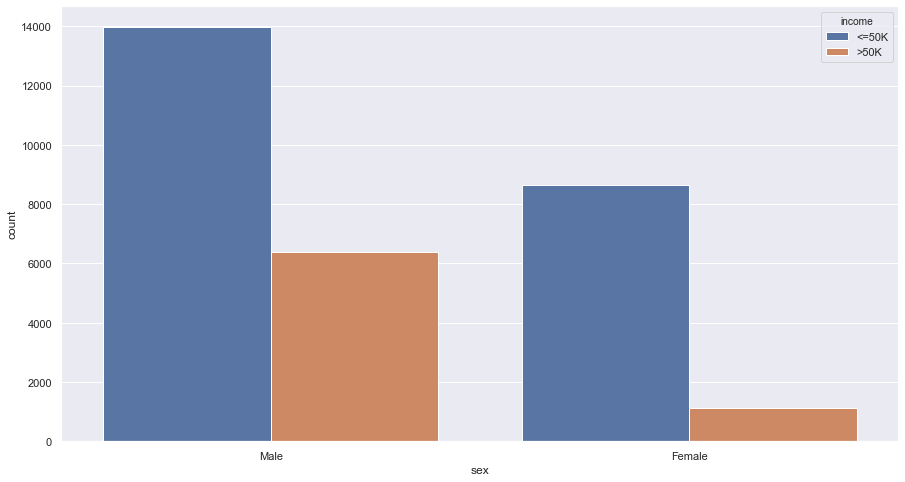

In [34]:
print(adult_df['sex'].value_counts()/adult_df['sex'].count()*100)

plt.figure(figsize=(15,8))
sb.countplot(adult_df['sex'], hue=adult_df['income'])

United-States                 91.200770
Mexico                         2.010684
Philippines                    0.623777
Germany                        0.424699
Puerto-Rico                    0.361658
Canada                         0.355022
India                          0.331796
El-Salvador                    0.331796
Cuba                           0.305252
England                        0.285345
Jamaica                        0.265437
South                          0.235575
China                          0.225621
Italy                          0.225621
Dominican-Republic             0.222303
Vietnam                        0.212349
Guatemala                      0.202396
Japan                          0.195760
Poland                         0.185806
Columbia                       0.185806
Taiwan                         0.139354
Haiti                          0.139354
Iran                           0.139354
Portugal                       0.112811
Nicaragua                      0.109493


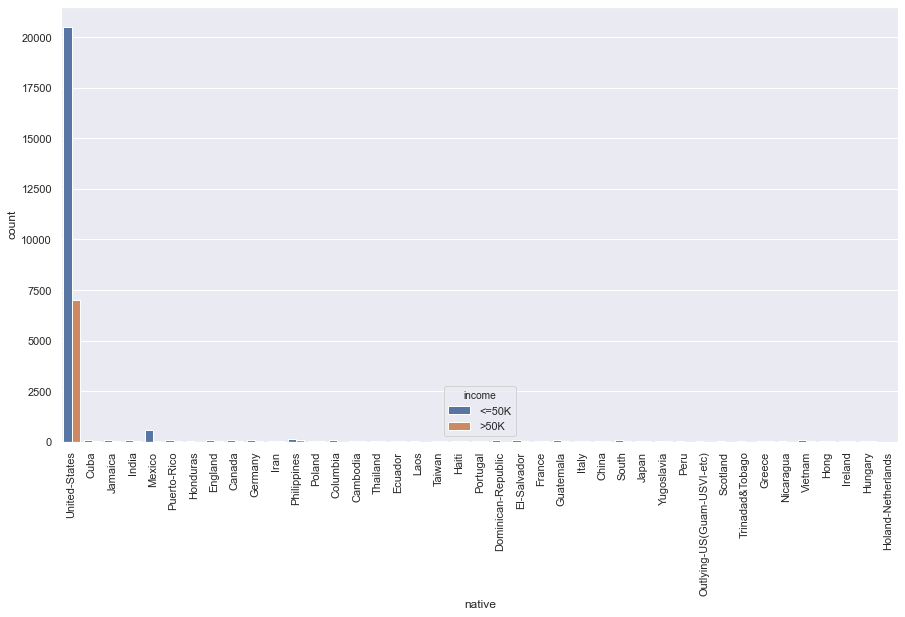

In [35]:
print(adult_df['native'].value_counts()/adult_df['native'].count()*100)

plt.figure(figsize=(15,8))
sb.countplot(adult_df['native'], hue=adult_df['income'])
plt.xticks(rotation=90)
plt.show()

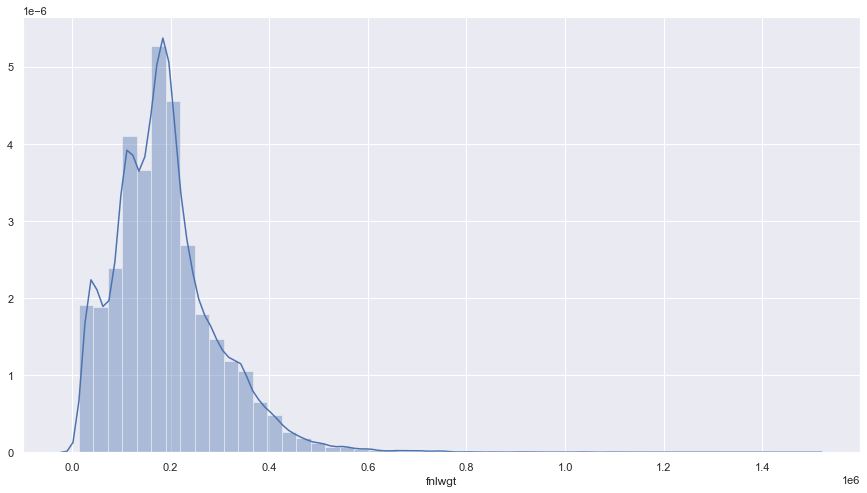

In [36]:
plt.figure(figsize=(15,8))
sb.distplot(adult_df['fnlwgt'])

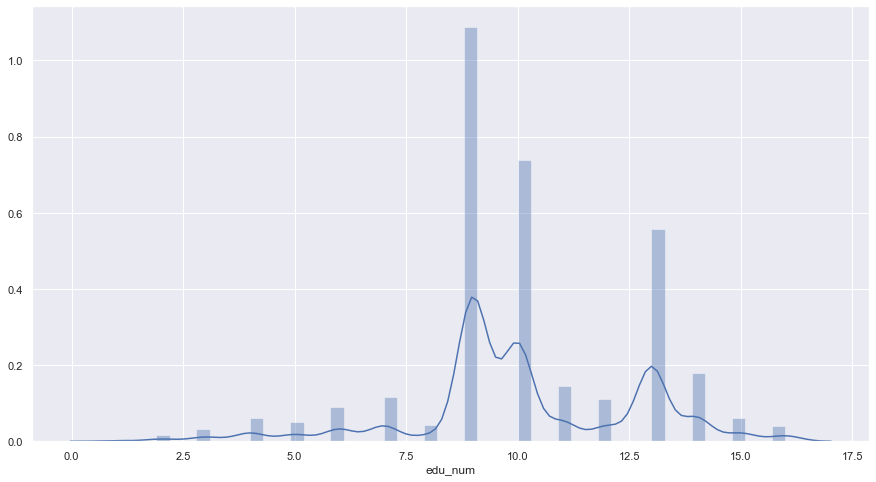

In [37]:
plt.figure(figsize=(15,8))
sb.distplot(adult_df['edu_num'])

In [38]:
adult_df['income'].replace('<=50K', value=0, inplace=True)
adult_df['income'].replace('>50K', value=1, inplace=True)

In [39]:
# Dropping numerical columns in which more than 90% of data come from the same category
# We already saw for categorical columns
dropcols = ['native']
for each in numerical_cols.columns:
    if adult_df[each].value_counts(normalize=True).iloc[0] > 0.9:
        dropcols.append(each)
print(dropcols)

['native', 'capital-gain', 'capital-loss']


In [40]:
X = adult_df.drop(labels=dropcols+['income'], axis=1)
y = adult_df['income']

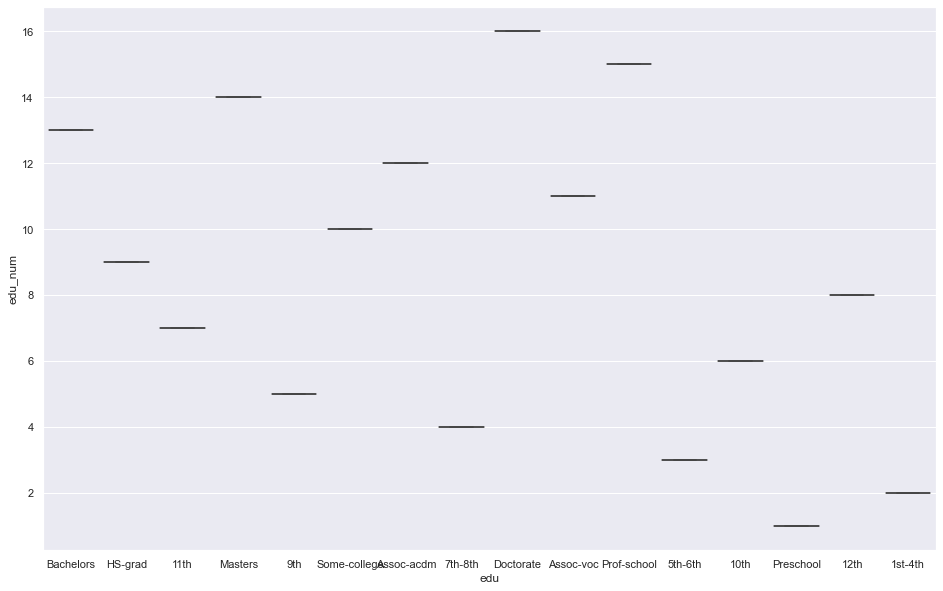

In [41]:
sb.boxplot('edu','edu_num',data=X)
plt.show()

In [42]:
X.drop('edu',axis=1,inplace=True)

In [43]:
# dropping final weight col
X.drop('fnlwgt',axis=1,inplace=True)

In [44]:
X.head()

,age,workclass,edu_num,marital_status,occupation,relationship,race,sex,hrspweek
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40


In [45]:
#Listing all options other than white
to_replace = list(X['race'].unique())
to_replace.remove('White')

#Placing all other categories under one bracket
X.replace(to_replace,'Other',inplace=True)
X['race'].value_counts(normalize=True)*100

White    85.974983
Other    14.025017
Name: race, dtype: float64

In [46]:
#Listing all options other than Private
to_replace = list(X['workclass'].unique())
to_replace.remove('Private')

#Placing all other categories under one bracket
X.replace(to_replace,'Non-pvt',inplace=True)
X['workclass'].value_counts(normalize=True)*100

Private    73.871064
Non-pvt    26.128936
Name: workclass, dtype: float64

In [47]:
#Listing all options other than never-married
to_replace = list(X['marital_status'].unique())
to_replace.remove('Never-married')
X.replace('Never-married','Single',inplace=True)
#Placing all other categories under one bracket
X.replace(to_replace,'Married',inplace=True)
X['marital_status'].value_counts(normalize=True)*100

Married    67.779289
Single     32.220711
Name: marital_status, dtype: float64

In [48]:
# Model Fitting and Testing

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression(max_iter = 1000)
regression.fit(x_train, y_train )
print("Train Accuracy:",regression.score(x_train, y_train))
print("Test Accuracy:",regression.score(x_test, y_test))

Train Accuracy: 0.8349428019610756
Test Accuracy: 0.8383269656143173


In [53]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

In [54]:
# Define the models evaluation function
def models_evaluation(X, y, folds): 
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

In [56]:
# Run models_evaluation function
models_evaluation(X, y, 5)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.833671,0.834102,0.782010,0.814294,0.439198,Support Vector Classifier
Precision,0.700816,0.701910,0.567282,0.647405,0.304062,Support Vector Classifier
Recall,0.580203,0.581004,0.525845,0.558485,0.971223,Gaussian Naive Bayes
F1 Score,0.634720,0.635633,0.545757,0.599650,0.463128,Support Vector Classifier
